In [46]:
from netCDF4 import Dataset
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import sys
np.set_printoptions(threshold=sys.maxsize) #array 전부 보이게

In [2]:
precip_raw=Dataset(r'./precip.mon.mean.nc','r')
air_raw=Dataset(r'./air.mon.mean.nc','r')

In [3]:
precip_rawdata=precip_raw.variables['precip'][:]
air_rawdata=air_raw.variables['air'][:]

In [4]:
precip_lat_data=precip_raw.variables['lat'][:]
print(precip_lat_data),len(precip_lat_data)#좌하단부터 시작작

[-88.75 -86.25 -83.75 -81.25 -78.75 -76.25 -73.75 -71.25 -68.75 -66.25
 -63.75 -61.25 -58.75 -56.25 -53.75 -51.25 -48.75 -46.25 -43.75 -41.25
 -38.75 -36.25 -33.75 -31.25 -28.75 -26.25 -23.75 -21.25 -18.75 -16.25
 -13.75 -11.25  -8.75  -6.25  -3.75  -1.25   1.25   3.75   6.25   8.75
  11.25  13.75  16.25  18.75  21.25  23.75  26.25  28.75  31.25  33.75
  36.25  38.75  41.25  43.75  46.25  48.75  51.25  53.75  56.25  58.75
  61.25  63.75  66.25  68.75  71.25  73.75  76.25  78.75  81.25  83.75
  86.25  88.75]


(None, 72)

In [5]:
precip_lon_data=precip_raw.variables['lon'][:]
print(precip_lon_data),len(precip_lon_data),72*144

[  1.25   3.75   6.25   8.75  11.25  13.75  16.25  18.75  21.25  23.75
  26.25  28.75  31.25  33.75  36.25  38.75  41.25  43.75  46.25  48.75
  51.25  53.75  56.25  58.75  61.25  63.75  66.25  68.75  71.25  73.75
  76.25  78.75  81.25  83.75  86.25  88.75  91.25  93.75  96.25  98.75
 101.25 103.75 106.25 108.75 111.25 113.75 116.25 118.75 121.25 123.75
 126.25 128.75 131.25 133.75 136.25 138.75 141.25 143.75 146.25 148.75
 151.25 153.75 156.25 158.75 161.25 163.75 166.25 168.75 171.25 173.75
 176.25 178.75 181.25 183.75 186.25 188.75 191.25 193.75 196.25 198.75
 201.25 203.75 206.25 208.75 211.25 213.75 216.25 218.75 221.25 223.75
 226.25 228.75 231.25 233.75 236.25 238.75 241.25 243.75 246.25 248.75
 251.25 253.75 256.25 258.75 261.25 263.75 266.25 268.75 271.25 273.75
 276.25 278.75 281.25 283.75 286.25 288.75 291.25 293.75 296.25 298.75
 301.25 303.75 306.25 308.75 311.25 313.75 316.25 318.75 321.25 323.75
 326.25 328.75 331.25 333.75 336.25 338.75 341.25 343.75 346.25 348.75
 351.2

(None, 144, 10368)

preprocessing

In [6]:
all_data=[]
for i in range(72):
    for j in range(144):
        line=[]
        for k in range(504):
            line.append(precip_rawdata[k][i][j])
        all_data.append(line)

finding optimal k by elbow method

In [7]:
def elbow(X):
    sse=[]
    for i in range(1,10):
        km=KMeans(n_clusters=i)
        km.fit(X)
        sse.append(km.inertia_)
    plt.plot(range(1,15),sse,'o-')
    plt.xlabel('K')
    plt.ylabel('SSE')
    plt.show()

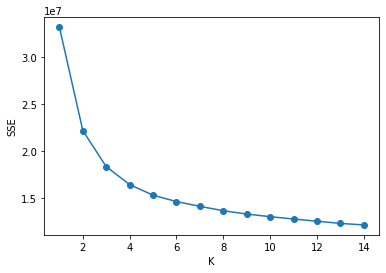

In [8]:
elbow(all_data)

kmeans clustering

In [54]:
KMeans=KMeans(n_clusters=5)
KMeans.fit(all_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
KMeans.labels_.shape

(10368,)

visualizing

In [68]:
import os
os.environ['PROJ_LIB'] = r'C:\Users\yunju\Anaconda3\pkgs\proj4-5.2.0-ha925a31_1\Library\share'
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
map = Basemap(llcrnrlat=-90, urcrnrlat=90,llcrnrlon=-180, urcrnrlon=180)

C:\Users\yunju\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


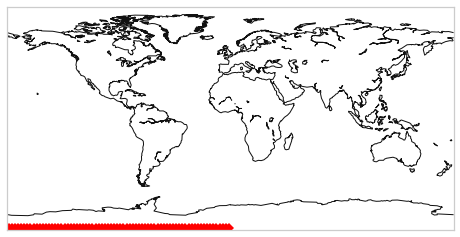

In [69]:
map.drawcoastlines()

for i in range(1):#위도
    for j in range(72):#경도
        a, b = map(precip_lon_data[j]-180,precip_lat_data[i])
        map.plot(a, b, marker='D',color='red')
plt.show()

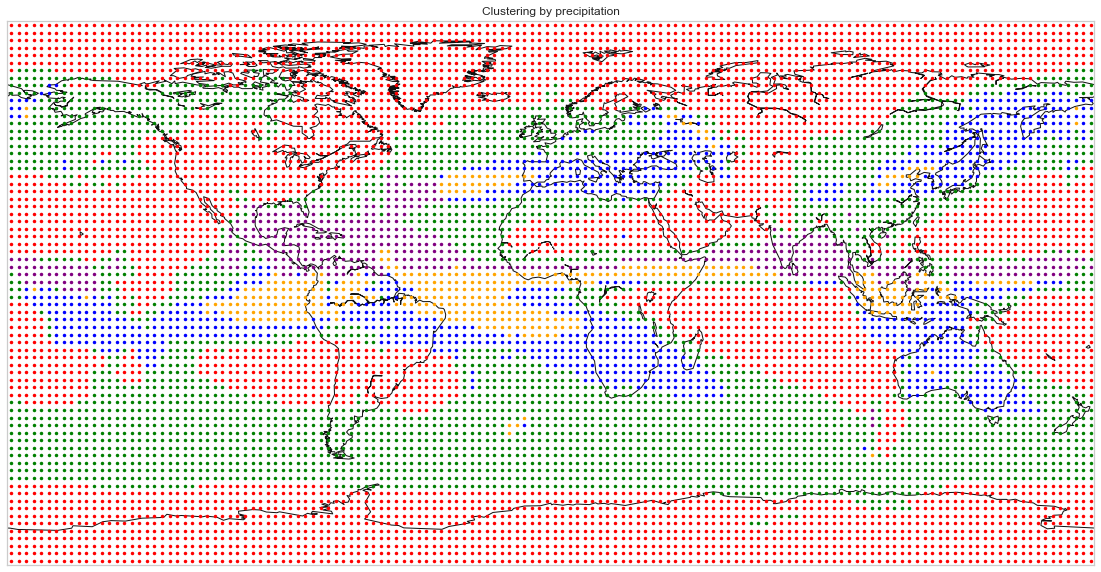

In [71]:
plt.figure(figsize=(22,10))
map.drawcoastlines()

for i in range(72):#위도
    for j in range(144):#경도
        if KMeans.labels_[144*i+j]==0:
            a, b = map(precip_lon_data[j]-180,precip_lat_data[i])
            map.plot(a, b, marker='.',color='red',markersize=7)
        if KMeans.labels_[144*i+j]==1:
            a, b = map(precip_lon_data[j]-180,precip_lat_data[i])
            map.plot(a, b, marker='.',color='orange',markersize=7)
        if KMeans.labels_[144*i+j]==2:
            a, b = map(precip_lon_data[j]-180,precip_lat_data[i])
            map.plot(a, b, marker='.',color='purple',markersize=7)            
        if KMeans.labels_[144*i+j]==3:
            a, b = map(precip_lon_data[j]-180,precip_lat_data[i])
            map.plot(a, b, marker='.',color='green',markersize=7)            
        if KMeans.labels_[144*i+j]==4:
            a, b = map(precip_lon_data[j]-180,precip_lat_data[i])
            map.plot(a, b, marker='.',color='blue',markersize=7)
plt.title('Clustering by precipitation')
plt.show()

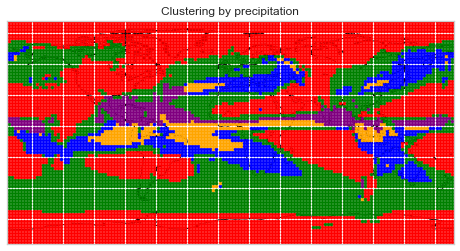

In [72]:
map.drawcoastlines()

for i in range(72):#위도
    for j in range(144):#경도
        if KMeans.labels_[144*i+j]==0:
            a, b = map(precip_lon_data[j]-180,precip_lat_data[i])
            map.plot(a, b, marker='.',color='red')
        if KMeans.labels_[144*i+j]==1:
            a, b = map(precip_lon_data[j]-180,precip_lat_data[i])
            map.plot(a, b, marker='.',color='orange')
        if KMeans.labels_[144*i+j]==2:
            a, b = map(precip_lon_data[j]-180,precip_lat_data[i])
            map.plot(a, b, marker='.',color='purple')            
        if KMeans.labels_[144*i+j]==3:
            a, b = map(precip_lon_data[j]-180,precip_lat_data[i])
            map.plot(a, b, marker='.',color='green')            
        if KMeans.labels_[144*i+j]==4:
            a, b = map(precip_lon_data[j]-180,precip_lat_data[i])
            map.plot(a, b, marker='.',color='blue')
plt.title('Clustering by precipitation')
plt.show()